In [1]:
#Data Visualization Imports
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stats = pd.read_csv('../input/tldata/tl_stats.csv')
tourny = pd.read_csv('../input/tldata/all_tournaments.csv')
display(stats.head(), tourny.head())

,Wiki,Teams,Tournaments
0,Age of Empires,15,427
1,Apex Legends,305,876
2,Arena FPS,24,800
3,Arena of Valor,126,255
4,Artifact,0,203


,name,enddate,location,prizepool,sponsors,wiki
0,Hidden Cup 2,4/14/2019,World,10200.0,NaN,ageofempires
1,Hidden Cup 2 Qualifier,3/25/2019,World,0.0,NaN,ageofempires
2,World Cyber Games 2001,12/9/2001,South Korea,35000.0,"[Samsung, Wide Info]",ageofempires
3,World Cyber Games 2001 - 2v2,12/9/2001,South Korea,11000.0,"[Samsung, Wide Info]",ageofempires
4,World Cyber Games Challenge 2000,10/15/2000,South Korea,50000.0,"[Samsung, Wide Info]",ageofempires


###### Parsing column enddate

In [4]:
date = tourny['enddate'].str.split('/', n=2, expand=True)
tourny['enddate'] = date[2]
tourny.head()

,name,enddate,location,prizepool,sponsors,wiki
0,Hidden Cup 2,2019,World,10200.0,NaN,ageofempires
1,Hidden Cup 2 Qualifier,2019,World,0.0,NaN,ageofempires
2,World Cyber Games 2001,2001,South Korea,35000.0,"[Samsung, Wide Info]",ageofempires
3,World Cyber Games 2001 - 2v2,2001,South Korea,11000.0,"[Samsung, Wide Info]",ageofempires
4,World Cyber Games Challenge 2000,2000,South Korea,50000.0,"[Samsung, Wide Info]",ageofempires


### General Statistics: # of Tournaments for each Game (all games with tournaments)

In [8]:
num_tourny = stats.sort_values(by=['Tournaments'], ascending=False)
num_tourny = num_tourny.reset_index(drop=True)
num_tourny.head()

,Wiki,Teams,Tournaments
0,StarCraft 2,464,10003
1,Counter-Strike,1191,9953
2,Smash,134,4135
3,Rocket League,901,3999
4,Hearthstone,0,3736


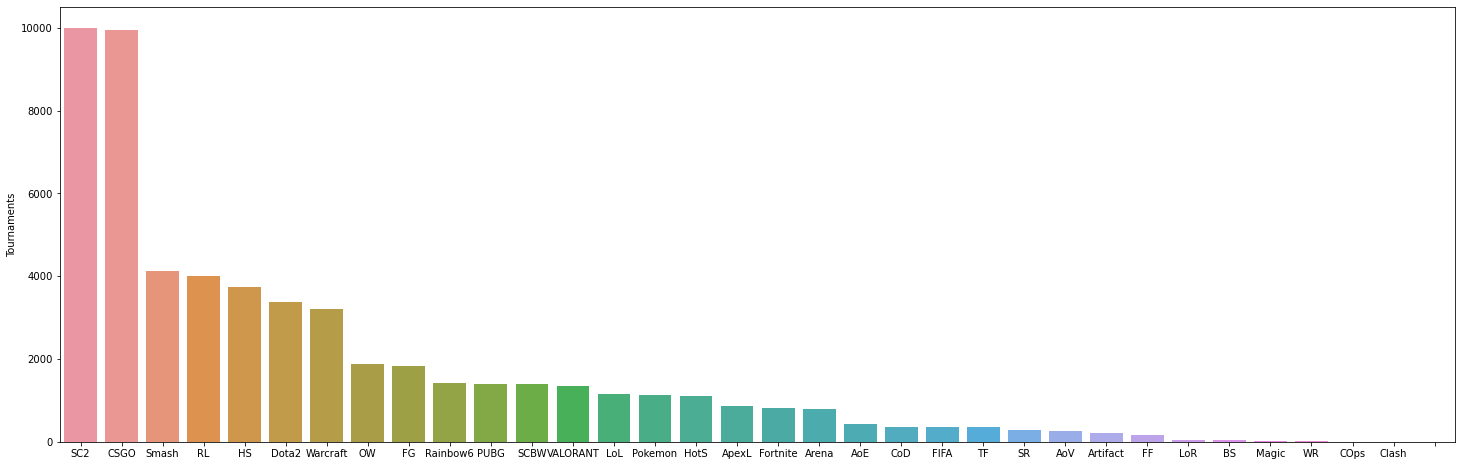

In [9]:
plt.figure(figsize=(25,8))
ax = sns.barplot(x=num_tourny.index, y="Tournaments", data=num_tourny)
ax.set(xticklabels=['SC2', 'CSGO', 'Smash', 'RL', 'HS', 'Dota2', 'Warcraft', 'OW', 'FG', 'Rainbow6', 'PUBG', 'SCBW', 'VALORANT', 'LoL', 'Pokemon', 'HotS', 'ApexL', 'Fortnite', 'Arena', 'AoE', 'CoD', 'FIFA', 'TF', 'SR', 'AoV', 'Artifact', 'FF', 'LoR', 'BS', 'Magic', 'WR', 'COps', 'Clash'])
plt.show()

##### Research what about SC2 and CSGO, that we have so many tournaments?

### Line chart on tournament prize pool

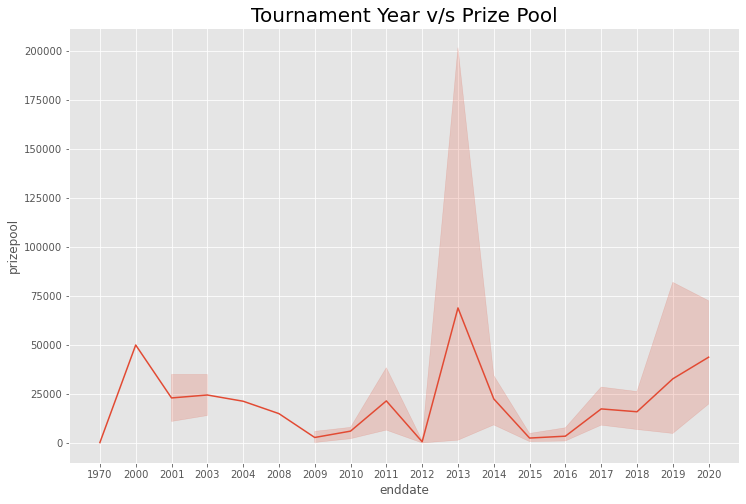

In [10]:
#print(plt.style.available)
#plt.style.use('dark_background')
plt.style.use('ggplot')
plt.figure(figsize=(12,8)) #comparing year v/s prizepool
sns.lineplot(tourny['enddate'], tourny['prizepool'], palette = "Set1")
plt.title('Tournament Year v/s Prize Pool', fontsize = 20)
plt.show()

##### Research what what happen from 2012 to 2014 that caused esports to be 'huge'?

### Frequent Sponsors E-Sport Locations

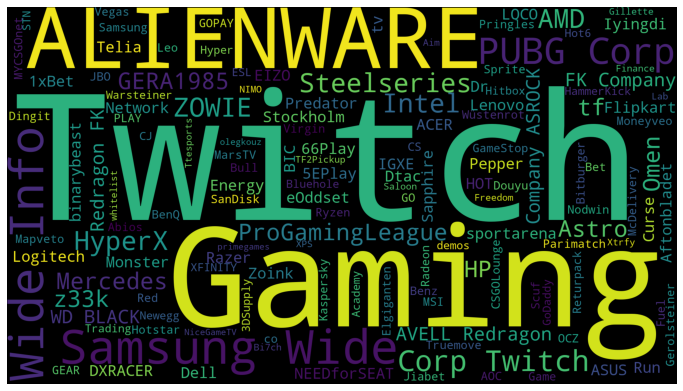

In [14]:
sponsors_wordcloud = tourny['sponsors'].dropna() 

from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(sponsors_wordcloud))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Why are twitch and alienware sponsers are more frequent in the esport industry?

### Wordwide Tournament Locations

In [15]:
#Todo

### Linear Regression Model to Predict Future Prize Pool
   * want to predict future prize pool because as gaming and esports progress, there are going to be larger audiences

##### Data Preprocessing

In [16]:
tournyc = tourny.copy()
tournyc.head()

,name,enddate,location,prizepool,sponsors,wiki
0,Hidden Cup 2,2019,World,10200.0,NaN,ageofempires
1,Hidden Cup 2 Qualifier,2019,World,0.0,NaN,ageofempires
2,World Cyber Games 2001,2001,South Korea,35000.0,"[Samsung, Wide Info]",ageofempires
3,World Cyber Games 2001 - 2v2,2001,South Korea,11000.0,"[Samsung, Wide Info]",ageofempires
4,World Cyber Games Challenge 2000,2000,South Korea,50000.0,"[Samsung, Wide Info]",ageofempires


In [184]:
tournyc['enddate'] = tournyc['enddate'].astype(int)
tournyc_numeric = tournyc[['enddate', 'prizepool']]
tournyc_numeric = tournyc_numeric[tournyc_numeric['enddate'] > 2000]
tournyc_numeric = tournyc_numeric[tournyc_numeric['prizepool'] > 30000]
tournyc_numeric2 = tournyc_numeric[tournyc_numeric['prizepool'] < 2000000]
#tournyc_numeric.sort_values(by=['prizepool'], ascending=True)

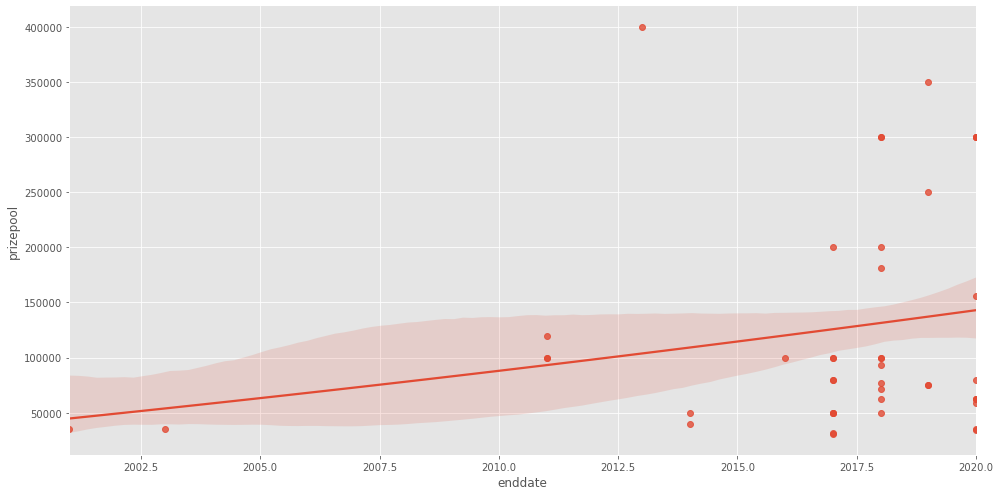

In [185]:
#base plot at 70% confidence interval
sns.lmplot(x ="enddate", y ="prizepool", data = tournyc_numeric2, order = 2, ci = 70, height=6, aspect=2)

##### Modeling

In [186]:
#Model Imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [187]:
#reshape
X = np.array(tournyc_numeric['enddate']).reshape(-1, 1) 
y = np.array(tournyc_numeric['prizepool']).reshape(-1, 1) 

In [248]:
from sklearn.metrics import r2_score, mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

regr = LinearRegression() 
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test)

print('r2 score:', regr.score(X_test, y_test))
print('RMSE : '+ str(np.sqrt(mean_squared_error(y_test, y_pred))))


r2 score: -1.2904894758897352
RMSE : 137591.0451942272


##### Test prediction, graphs, and evaluation

In [249]:
print("2014 prediction:", regr.predict([[2014]]))
print("2020 prediction:", regr.predict([[2020]]))
print("2021 prediction:", regr.predict([[2021]]))

2014 prediction: [[117129.48034038]]
2020 prediction: [[236801.55516431]]
2021 prediction: [[256746.90096831]]


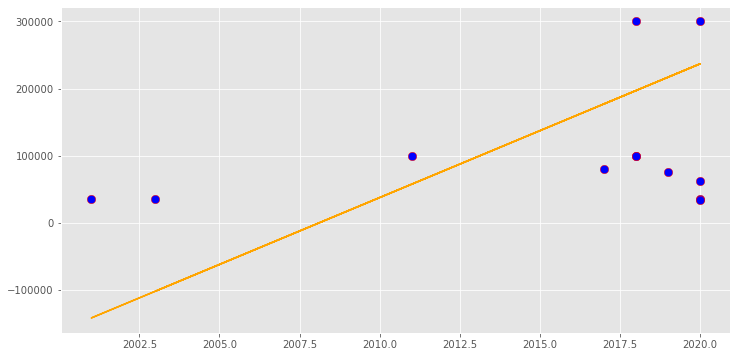

In [252]:
#1 plot
plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color ='b', edgecolors='red', s=70) 
plt.plot(X_test, y_pred, color ='orange', linewidth=1.5) 
plt.show() 